Our phantom directories are ['1742415463', '1742458786', '1742413505', '1742514866', '1742494829']
Meta data for phantom 1742494829: {'voxel_physical_scale': 0.001, 'source_dist_isocenter': 384.0, 'source_spect': {np.float64(0.001): np.float64(0.7666929244995118), np.float64(0.002606060606060606): np.float64(1.9381108373003808), np.float64(0.004212121212121212): np.float64(3.037609446533998), np.float64(0.005818181818181819): np.float64(4.0673997677754254), np.float64(0.007424242424242424): np.float64(5.029662359465091), np.float64(0.00903030303030303): np.float64(5.926547322908799), np.float64(0.010636363636363638): np.float64(6.760174302277722), np.float64(0.012242424242424242): np.float64(7.532632484608414), np.float64(0.01384848484848485): np.float64(8.245980599802799), np.float64(0.015454545454545453): np.float64(8.902246920628167), np.float64(0.01706060606060606): np.float64(9.503429262717185), np.float64(0.018666666666666668): np.float64(10.051494984567901), np.float64(0.0202727

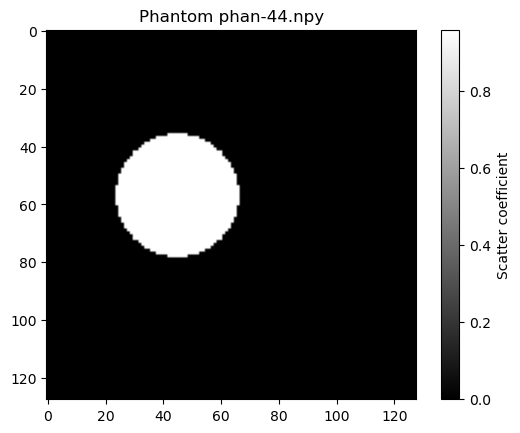

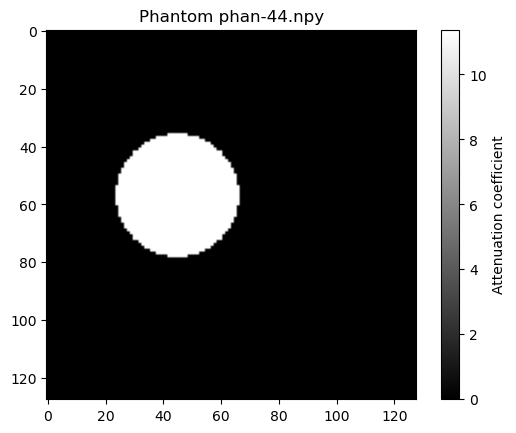

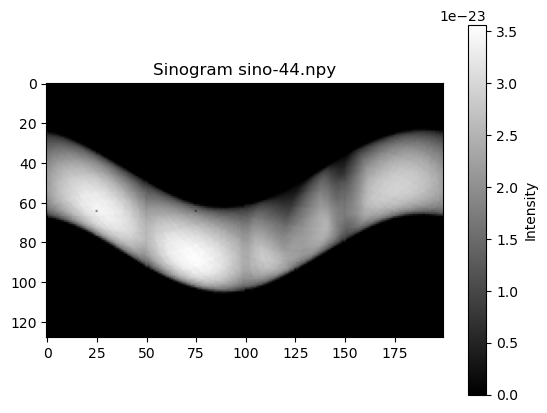

In [75]:
#@title Let's use this notebook to analyse the data we're generating

import numpy as np
import matplotlib.pyplot as plt
import os

# Get all directories within ../data folder
data_dir = '../data'
dirs = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
print(f"Our phantom directories are {dirs}")

# Get all files within a directory
def get_files_in_dir(dir_name):
    return [f for f in os.listdir(os.path.join(data_dir, dir_name)) if os.path.isfile(os.path.join(data_dir, dir_name, f))]

# Select random directory, then a random file beginning with "phan"
dir_name = np.random.choice(dirs)
files = get_files_in_dir(dir_name)
phan_file_name = np.random.choice([f for f in files if f.startswith('phan')])
sino_file_name = f"sino-{phan_file_name.split("-")[1].split(".")[0]}.npy"

# Load meta.npy file
meta = np.load(os.path.join(data_dir, dir_name, 'meta.npy'), allow_pickle=True).item()
print(f"Meta data for phantom {dir_name}: {meta}")

# Load the data
phan_data = np.load(os.path.join(data_dir, dir_name, phan_file_name))
# Display the data
plt.imshow(phan_data[0], cmap='gray')
plt.title(f"Phantom {phan_file_name}")
plt.colorbar(label="Scatter coefficient")
plt.show()
plt.imshow(phan_data[1], cmap='gray')
plt.title(f"Phantom {phan_file_name}")
plt.colorbar(label="Attenuation coefficient")
plt.show()

# Load the data
sino_data = np.load(os.path.join(data_dir, dir_name, sino_file_name))
# Display the data
plt.imshow(np.sum(sino_data, axis=2), cmap='gray')
plt.title(f"Sinogram {sino_file_name}")
plt.colorbar(label="Intensity")
plt.show()


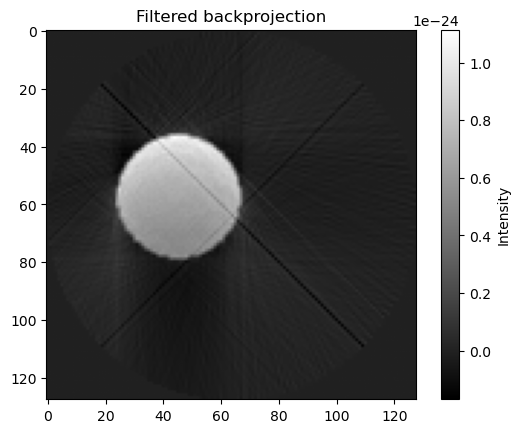

In [76]:
#@title Let's use some classical reconstruction algorithms to reconstruct the phantom

import numpy as np
from skimage.transform import iradon

# Filtered backprojection
# P.S. skimage's iradon seems to just do 180 degrees, so we'll just use the first half of the sinogram
recon = iradon(np.sum(sino_data, axis=2)[:,:100], circle=True, filter_name='ramp')

# Display the data
plt.imshow(recon, cmap='gray')
plt.title(f"Filtered backprojection")
plt.colorbar(label="Intensity")
plt.show()